In [1]:
# Project 1
# Algerain Forest Fire

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('Algerian_forest_fires_dataset.csv',header=1)
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [3]:
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [4]:
# divinding dataset as it has 2 regions info
df.loc[:122,"Region"]=1 
df.loc[122:,"Region"]=0

In [5]:
df[['Region']]=df[['Region']].astype(int)

In [6]:
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN,0


In [7]:
# drop NULL & reset index
df = df.dropna().reset_index(drop=True)

In [8]:
df = df.drop(122).reset_index(drop=True)

In [9]:
# removing white spaces ('Classes ')
df.columns = df.columns.str.strip()
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [10]:
# converting to int
df[['day','month','year','Temperature','RH','Ws']]=df[['day','month','year','Temperature','RH','Ws']].astype(int)

In [11]:
# converting to float

objs = [features for features in df.columns if df[features].dtype=='O']      # 'O' = object class

# except 'Classes'

for i in objs:
    if i!='Classes':
        df[i]=df[i].astype(float)

In [12]:
# cleaned DF to csv

df.to_csv('Algerian_forest_fires_cleaned_dataset.csv',index=False)

In [13]:
# EDA
df_copy = df.drop(['day','month','year'],axis=1)
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,1
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,1
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,1


In [14]:
# encoding 'Classes'
df_copy['Classes'].unique()

df_copy['Classes']=df_copy['Classes'].str.strip()

In [15]:
df_copy['Classes'].unique()

array(['not fire', 'fire'], dtype=object)

In [16]:
df_copy['Classes']=np.where(df_copy['Classes']=='not fire',0,1)
df_copy['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

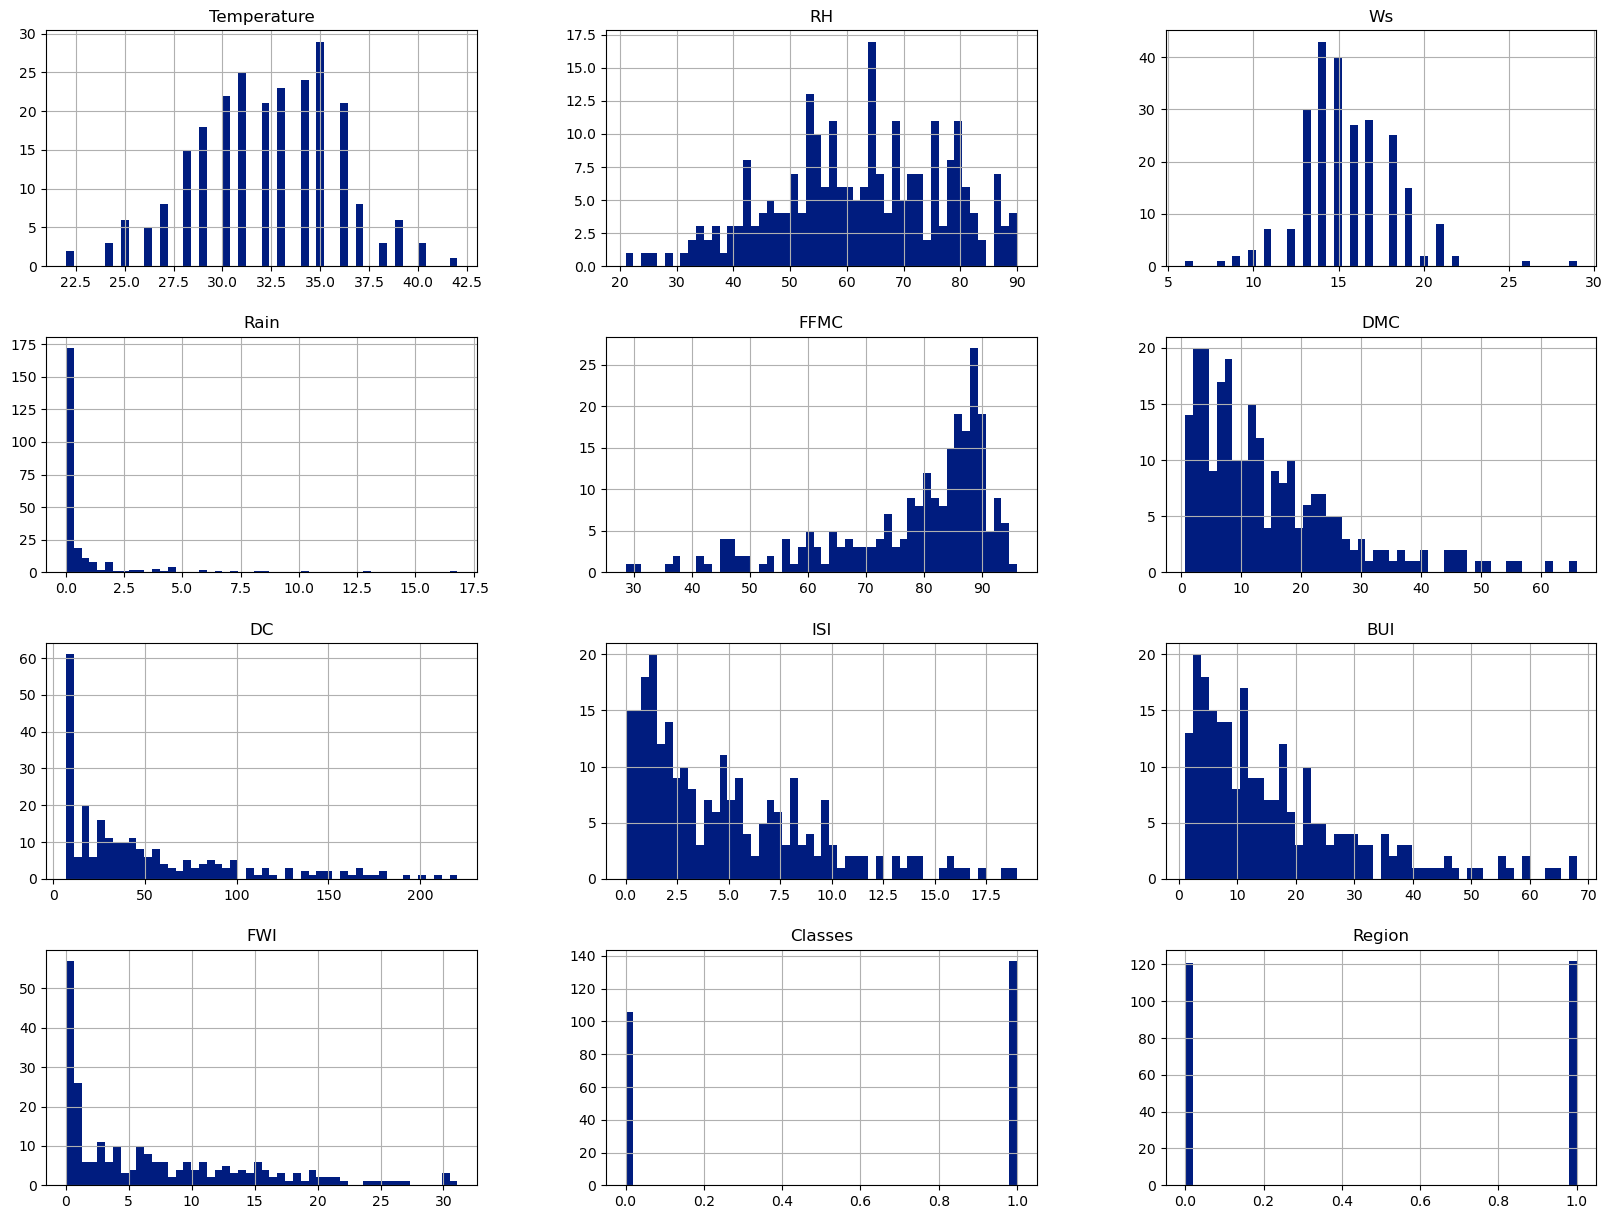

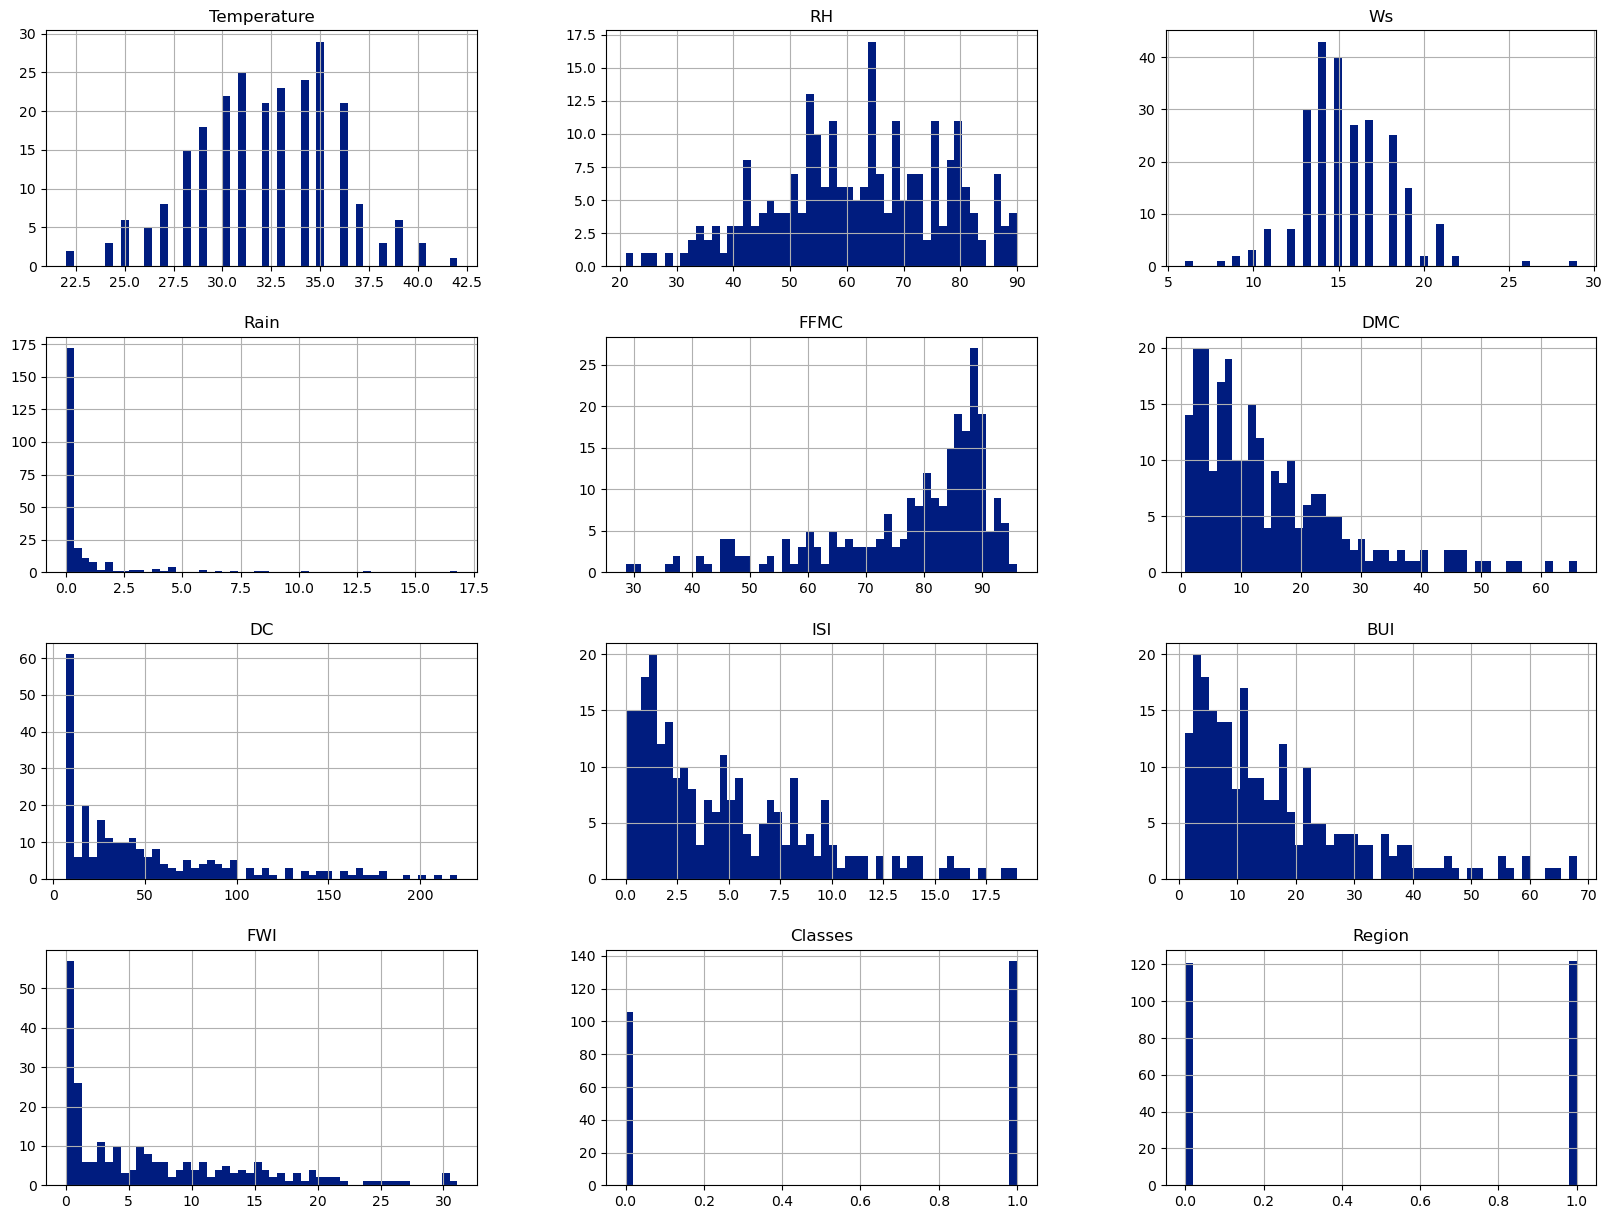

In [21]:
# plotting

plt.style.use('seaborn-v0_8-dark-palette')
df_copy.hist(bins=50,figsize=(20,15))
plt.show()

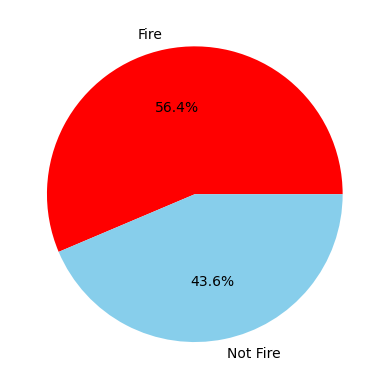

In [29]:
# plotting pie
percentage = df_copy['Classes'].value_counts(normalize=True)*100
percentage

labels = ['Fire','Not Fire']
colors = ['red','skyblue']
plt.pie(percentage,labels=labels,colors=colors,autopct='%1.1f%%')
plt.show()

In [30]:
# correlations

df_copy.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,-0.269555
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,0.402682
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,0.181160
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,0.040013
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,-0.222241
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,-0.192089
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,0.078734
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,-0.263197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639,-0.089408
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216,-0.197102


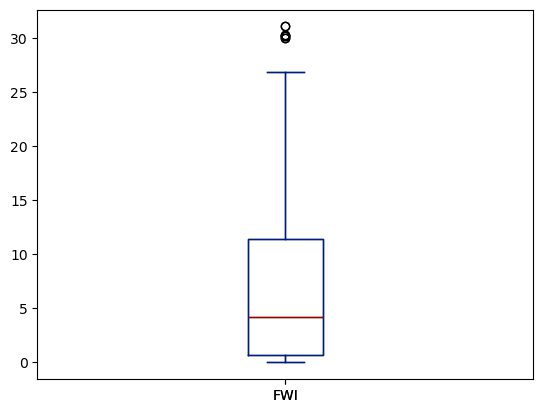

In [33]:
df_copy['FWI'].plot(kind='box')
plt.show()

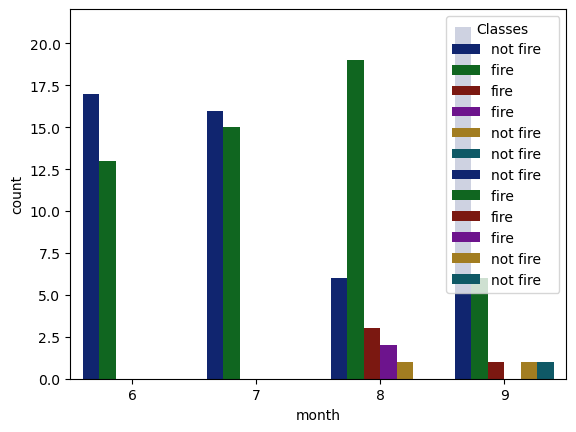

In [40]:
# comparison bar charts
import seaborn as sns 

dftemp = df.loc[df['Region']==1]
sns.countplot(x='month',hue="Classes",data=dftemp)
plt.show()